<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title></title>
</head>
<body>
<div style="text-align: center;">
  <h1>Task 1</h1>
  <h2>Distinguishing between Abdominal and Heart Ultrasounds</h2>
</div>
<h3>Loading/Preprocessing images:</h3>
<p><li>Load Images(.jpg,.tiff)</li>
<li>resize,histogram,normalization</li>
<li>convert into data frame</li></p>
</body>
</html>


In [1]:
#this code will show you number of images in each dir and type of images 
import os  
import cv2 
import numpy as np 
from tqdm import tqdm  # It is for progress bars during loading

# We define  function for  load images from a perticuler directory.
def load_images_from_directory(directory_path):
    # empty list for storing the imag
    images = []
    
    # Iterate in each file in the directory
    for file in os.listdir(directory_path):
        # Checking  if the file ends with either '.jpg' or '.tiff'
        if file.endswith('.jpg') or file.endswith('.tiff'):
            # Reading  the images file using openCV and convert it to grayscale
            img = cv2.imread(os.path.join(directory_path, file), cv2.IMREAD_GRAYSCALE)
            # Append the grayscale image to the list of images
            images.append(img)
    
    # Return the list of images
    return images

# these are the paths to directories containing different types of imag i know in first task there is no need to accese all img but just for clear 
#understanding 
closed_heart_path = 'data/heart/closed'  
open_heart_path = 'data/heart/open' 
contours_path = 'data/heart/various/contours' 
masks_path = 'data/heart/various/masks' 
non_heart_path = 'data/non-heart' 

closed_heart_images = load_images_from_directory(closed_heart_path)
open_heart_images = load_images_from_directory(open_heart_path)
contours_images = load_images_from_directory(contours_path)
masks_images = load_images_from_directory(masks_path)
non_heart_images = load_images_from_directory(non_heart_path)

# convert the lists of images into NumPy arrays for easier manipulation
closed_heart_images = np.array(closed_heart_images)
open_heart_images = np.array(open_heart_images)
contours_images = np.array(contours_images)
masks_images = np.array(masks_images)
non_heart_images = np.array(non_heart_images)



print("Heart ultrasound images:")
print("Total number of closed heart ultrasound images:", len(closed_heart_images))
print("Total number of open heart ultrasound images:", len(open_heart_images))
print("Total number of various heart ultrasound images:", len(contours_images))
print("Total number of mask images:", len(masks_images))

print("\nNon-Heart Ultrasound Images:")
print("Number of non-heart images:", len(non_heart_images))




Heart ultrasound images:
Total number of closed heart ultrasound images: 80
Total number of open heart ultrasound images: 138
Total number of various heart ultrasound images: 218
Total number of mask images: 218

Non-Heart Ultrasound Images:
Number of non-heart images: 925


Visualizing 5 Closed Heart ultrasound images:


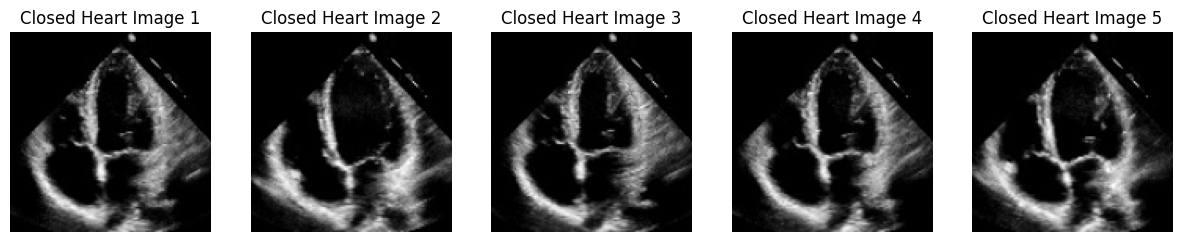

Visualizing 5 Open Heart ultrasound images:


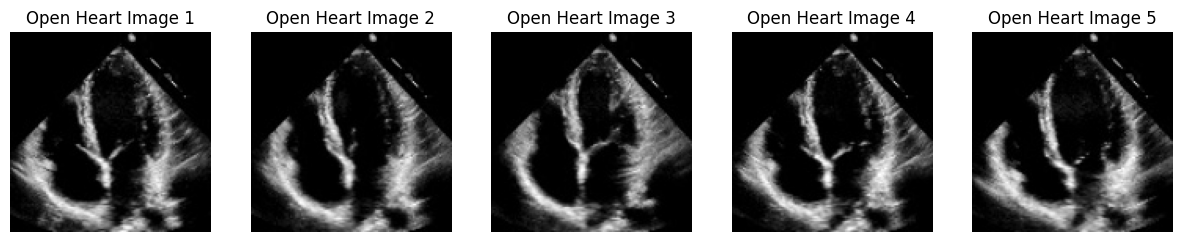

Visualizing 5 Various Heart ultrasound images:


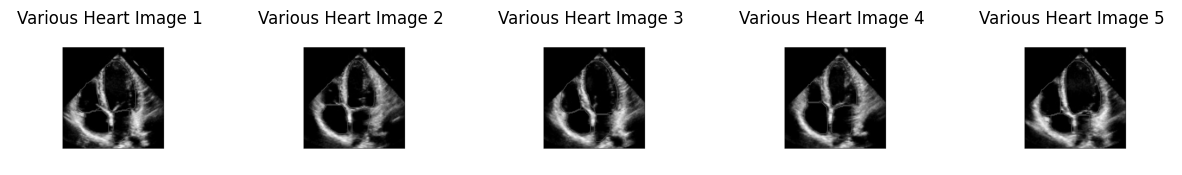

Visualizing 5 Mask ultrasound images:


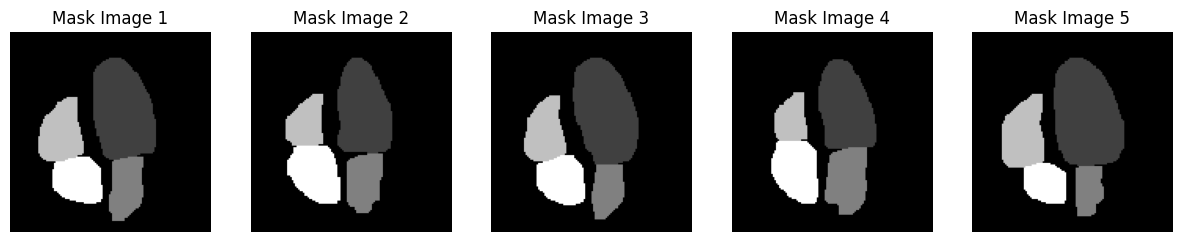

In [2]:
#just to ensure that images are properly loaded we do  visualizing the images 
import matplotlib.pyplot as plt
def visualize_imagess(images, category, num_images=5):
    print(f"Visualizing {num_images} {category} ultrasound images:")
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"{category} Image {i+1}")
    plt.show()

#for closed heart
visualize_imagess(closed_heart_images, "Closed Heart")

#for open
visualize_imagess(open_heart_images, "Open Heart")

#for tiff format heart
visualize_imagess(contours_images, "Various Heart")

#for mask
visualize_imagess(masks_images, "Mask")


In [3]:
#in this code we will convert the images into data frame and lable and i took images size 75*75...
resize_width = 75
resize_height = 75

#this function for loading img with correct format 
def load_and_flatten_images(directory, label, block_size=11, constant=2):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            
            img = cv2.resize(img, (resize_width, resize_height))
            
            
           # Apply histogram equalization for enhanceing the immge  it will increase the contrast 
            img = cv2.equalizeHist(img)
            
            # and then normalizations it helps to convert the image into format of o and 1
            normalized_img = img.astype('float32') / 255.0
            
            images.append(normalized_img.flatten())
    labels = [label] * len(images)
    return images, labels

closed_images, closed_labels = load_and_flatten_images(closed_heart_path, 'Its_heart')
open_images, open_labels = load_and_flatten_images(open_heart_path, 'Its_heart')
non_heart_images, non_heart_labels = load_and_flatten_images(non_heart_path, 'its_abdominal')

#combining the  closed heart and open heart because for first task we only need these two types of heart 
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

#converting it into dataframe pd converstions 
heart_data = pd.DataFrame(heart_images)
heart_data['class'] = heart_labels

# converting the  non heart into dataframe 
non_heart_data = pd.DataFrame(non_heart_images)
non_heart_data['class'] = non_heart_labels

# displaying the data
print("Heart Ultrasound Images:")
print(heart_data)

print("\nNon-Heart Ultrasound Images:")
print(non_heart_data)


Heart Ultrasound Images:
       0    1    2    3    4    5    6    7    8    9  ...      5616  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.141176   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.160784   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.200000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
213  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.235294   
214  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
215  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
216  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
217  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

         5617      5618      5619      5620      5621      5622      5623  \
0    0.000000  0.000000  0.176471

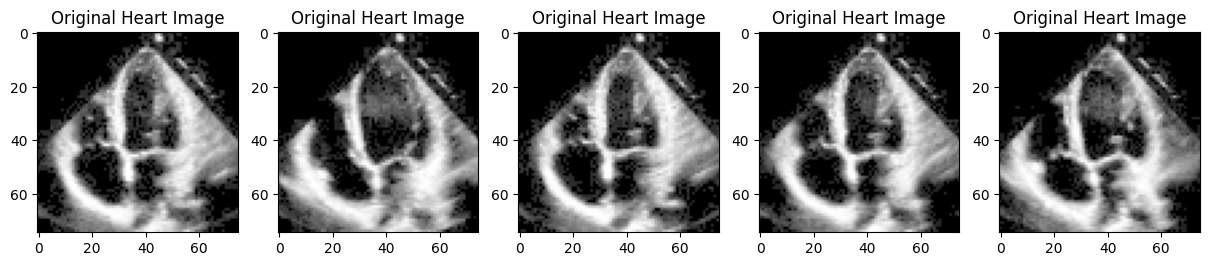

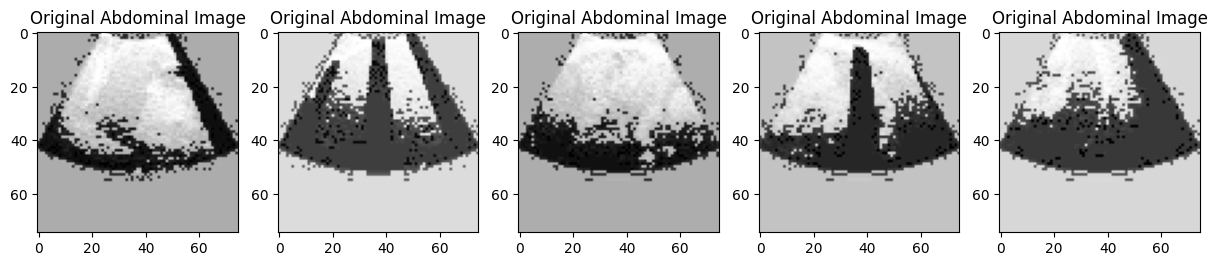

In [4]:
import matplotlib.pyplot as plt

#this code will show the output of our preprocessd data 
heart_images = heart_data.iloc[:, :-1].values.astype(float)
abdominal_images = non_heart_data.iloc[:, :-1].values.astype(float)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(heart_images[i].reshape(resize_width, resize_height), cmap='gray')
    axes[i].set_title('Original Heart Image')
plt.show()

# Ploting updated imge data 
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(abdominal_images[i].reshape(resize_width, resize_height), cmap='gray')
    axes[i].set_title('Original Abdominal Image')
plt.show()
#we can see that after preprocess the data image incresd bightness  there so many way to enhanced the quality of images 

<h3>below this code train multiple classifiers machine learning model on heart images and non heart images </h3>

<h4>->support vector machine</h4>
<h4>-> rendom forest</h4>
<h4>-> naive bayes</h4>   

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# loading the the close+open heart data into singal data frame 
X_heart = heart_data.drop('class', axis=1)
y_heart = heart_data['class'] # i provided  its_heart lable for heart images 

#spliting data in to feature and lables 
X_non_heart = non_heart_data.drop('class', axis=1)
y_non_heart = non_heart_data['class']

# spliting data in train and test for heart
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart)

# spliting data in train and test for non heart 
X_train_non_heart, X_test_non_heart, y_train_non_heart, y_test_non_heart = train_test_split(X_non_heart, y_non_heart, test_size=0.2, random_state=42, stratify=y_non_heart)

X_train = pd.concat([X_train_heart, X_train_non_heart], axis=0)
X_test = pd.concat([X_test_heart, X_test_non_heart], axis=0)
y_train = pd.concat([y_train_heart, y_train_non_heart], axis=0)
y_test = pd.concat([y_test_heart, y_test_non_heart], axis=0)


#train the models
svm = SVC(probability=True)  #this true ensure to enable predict_proba so it can work efficently
rf = RandomForestClassifier()
nb = GaussianNB()

svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)

#prictions
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

# evaluvation the model
svm_precision = precision_score(y_test, svm_preds, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')

rf_precision = precision_score(y_test, rf_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

nb_precision = precision_score(y_test, nb_preds, average='weighted')
nb_recall = recall_score(y_test, nb_preds, average='weighted')
nb_f1 = f1_score(y_test, nb_preds, average='weighted')

# calcualte auc_roc _score     ---------------------------------   (Week 7 (5/3) – TOPIC 6: Metrics for Performance Evaluation)
svm_scores = svm.decision_function(X_test)
svm_auc_roc = roc_auc_score(y_test, svm_scores)


rf_probs = rf.predict_proba(X_test)
rf_auc_roc = roc_auc_score(y_test, rf_probs[:, 1])

nb_probs = nb.predict_proba(X_test)
nb_auc_roc = roc_auc_score(y_test, nb_probs[:, 1])

# Print evaluation metrics
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM AUC-ROC:", svm_auc_roc)
print()
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest AUC-ROC:", rf_auc_roc)
print()
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes AUC-ROC:", nb_auc_roc)


joblib.dump(svm, 'svm_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(nb, 'nb_model.pkl')
svm = joblib.load('svm_model.pkl')
rf = joblib.load('rf_model.pkl')
nb = joblib.load('nb_model.pkl')

SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0
SVM AUC-ROC: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0
Random Forest AUC-ROC: 1.0

Naive Bayes Precision: 0.9956566652580175
Naive Bayes Recall: 0.9956331877729258
Naive Bayes F1-score: 0.9956139763426118
Naive Bayes AUC-ROC: 0.9886363636363636


<h3> I created a folder sometestingofmodel there are some unseen data and im gona test those unseen data on trained model </h3>

<h4>its_heart=heart</h4>

<h4>its_abdominal= non-heart</h4>

In [6]:
import os

#folder which is containing the unseen img data 
test_image_dir = r'sometestingofmodel'
test_images = []
for file in os.listdir(test_image_dir):
    if file.endswith('.jpg') or file.endswith('.tiff'):
        img = cv2.imread(os.path.join(test_image_dir, file), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (resize_width, resize_height))
        img_histogram = cv2.equalizeHist(img_resized)
        normalized_img = img_histogram.astype('float32') / 255.0
        test_images.append(normalized_img.flatten())
X_test = pd.DataFrame(test_images)



# make the predictions 
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

# display the output
# I know we are not working with tiff format type img just for my prectise im writing complete code 
for i, file in enumerate(os.listdir(test_image_dir)):
    if file.endswith('.jpg') or file.endswith('.tiff'):
        print(f"Image: {file}, SVM Prediction: {svm_preds[i]}, RF Prediction: {rf_preds[i]}, NB Prediction: {nb_preds[i]}")




Image: 1.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal
Image: 2.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal
Image: 23.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 25.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 26.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 27.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 3.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal
Image: 4.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal




<h3> Convolutional Neural Network (CNN)</h3>
<h4>information taken from here  </h4>
<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb#scrollTo=DSPCom-KmApV" target="_blank">https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb#scrollTo=DSPCom-KmApV</a>


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models


# spliting data  for train and test
all_images = np.concatenate([heart_images, non_heart_images])
all_labels = np.concatenate([heart_labels, non_heart_labels])
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

#yes we have done this step normalization but its good prectise to ensure again your code 
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

image_shape = (75, 75, 1)  #  grayscale images with dimensions 25x25
train_images_reshaped = train_images_normalized.reshape(-1, 75, 75, 1)
test_images_reshaped = test_images_normalized.reshape(-1, 75, 75, 1)

#its a one hot encoding so that it will convert all string into numerical format for easy manipulation for machine learning model
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_test_labels = label_encoder.transform(test_labels)
num_classes = len(label_encoder.classes_)

#  architecture of the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compiling the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Training the model
cnn_model.fit(train_images_reshaped, encoded_train_labels, epochs=10, batch_size=32, validation_split=0.1)

# Evaluating the model
test_loss, test_accuracy = cnn_model.evaluate(test_images_reshaped, encoded_test_labels)
print('Test accuracy:', test_accuracy)

# saving this model in this perticuler location its a pb format type.
cnn_model.save(r'C:\Users\Hp\Desktop\ads')






Epoch 1/10


26/26 [==============================] - 5s 114ms/step - loss: 0.5340 - accuracy: 0.7835 - val_loss: 0.4570 - val_accuracy: 0.8261
Epoch 2/10
26/26 [==============================] - 2s 94ms/step - loss: 0.4859 - accuracy: 0.8078 - val_loss: 0.4461 - val_accuracy: 0.8261
Epoch 3/10
26/26 [==============================] - 3s 96ms/step - loss: 0.4538 - accuracy: 0.8078 - val_loss: 0.3888 - val_accuracy: 0.8261
Epoch 4/10
26/26 [==============================] - 3s 98ms/step - loss: 0.3048 - accuracy: 0.8078 - val_loss: 0.1557 - val_accuracy: 0.8261
Epoch 5/10
26/26 [==============================] - 2s 95ms/step - loss: 0.1441 - accuracy: 0.8662 - val_loss: 0.1201 - val_accuracy: 0.9891
Epoch 6/10
26/26 [==============================] - 3s 96ms/step - loss: 0.1301 - accuracy: 0.9988 - val_loss: 0.1155 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 3s 99ms/step - loss: 0.1255 - accuracy: 1.0000 - val_loss: 0.1115 - val_accuracy: 1.0000
Epoch 

INFO:tensorflow:Assets written to: C:\Users\Hp\Desktop\ads\assets


 <h2 style="text-align: center;">Short Report of Calculated Model Accuracy</h2>


<table>
  <tr>
    <th>Model</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-score</th>
    <th>AUC-ROC</th>
  </tr>
  <tr>
    <td>SVM</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>0.9956566652580175</td>
    <td>0.9956331877729258</td>
    <td>0.9956139763426118</td>
    <td>0.9886363636363636</td>
  </tr>
</table><h5 style="text-align: center;">Test accuracy of CNN model: 0.9301310181617737</h5>

<h6 style="text-align: center;">all models performing  perfact on  evaluation metric  and achieving acurate  scores in many scenario like  precision, recall, F1-score, and auc-roc. </h6>


<h5>
  <li>The validation accuracy is high, reaching 100% accuracy in some epochs. This might be a sign of overfitting, as the model could be memorizing the data patterns. To ensure this, we will perform <h3>five-fold cross-validation</h3>.
  </li>
</h5>
<img src="https://www.researchgate.net/profile/Ivanna-Baturynska/publication/340524896/figure/fig4/AS:878319096565762@1586418999414/Description-of-5-fold-cross-validation.png" alt="Description of 5-fold cross-validation" style="width: 50%;">
<p>I took from here -><a href="https://www.researchgate.net/figure/Description-of-5-fold-cross-validation_fig4_340524896#:~:text=...%20the%20five%2Dfold,procedure%20is%20repeated%20k%20times." target="_blank">https://www.researchgate.net/figure/Description-of-5-fold-cross-validation_fig4_340524896#:~:text=...%20the%20five%2Dfold,procedure%20is%20repeated%20k%20times.</a></p>


In [38]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

X_combined = np.concatenate((X_heart, X_non_heart), axis=0)
y_combined = np.concatenate((y_heart, y_non_heart), axis=0)

# number of folds 
n_folds = 5

#for storeing the result 
svm_precisions, svm_recalls, svm_f1s = [], [], []
rf_precisions, rf_recalls, rf_f1s = [], [], []
nb_precisions, nb_recalls, nb_f1s = [], [], []

# performing 5 fold 
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
for fold_idx, (train_index, test_index) in enumerate(skf.split(X_combined, y_combined), 1):
    X_train, X_test = X_combined[train_index], X_combined[test_index]
    y_train, y_test = y_combined[train_index], y_combined[test_index]
    
    #train machine learning model
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_preds = svm.predict(X_test)
    svm_prec = precision_score(y_test, svm_preds, average='weighted')
    svm_rec = recall_score(y_test, svm_preds, average='weighted')
    svm_f1 = f1_score(y_test, svm_preds, average='weighted')
    svm_precisions.append(svm_prec)
    svm_recalls.append(svm_rec)
    svm_f1s.append(svm_f1)
    

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    rf_prec = precision_score(y_test, rf_preds, average='weighted')
    rf_rec = recall_score(y_test, rf_preds, average='weighted')
    rf_f1 = f1_score(y_test, rf_preds, average='weighted')
    rf_precisions.append(rf_prec)
    rf_recalls.append(rf_rec)
    rf_f1s.append(rf_f1)
    

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_preds = nb.predict(X_test)
    nb_prec = precision_score(y_test, nb_preds, average='weighted')
    nb_rec = recall_score(y_test, nb_preds, average='weighted')
    nb_f1 = f1_score(y_test, nb_preds, average='weighted')
    nb_precisions.append(nb_prec)
    nb_recalls.append(nb_rec)
    nb_f1s.append(nb_f1)
    
    # print the each fold evaluations for better understanding 
    print(f"Fold {fold_idx}:")
    print("\n")
    print("SVM Precision:", svm_prec)
    print("SVM Recall:", svm_rec)
    print("SVM F1-score:", svm_f1)
    print()
    print("Random Forest Precision:", rf_prec)
    print("Random Forest Recall:", rf_rec)
    print("Random Forest F1-score:", rf_f1)
    print()
    print("Naive Bayes Precision:", nb_prec)
    print("Naive Bayes Recall:", nb_rec)
    print("Naive Bayes F1-score:", nb_f1)
    print("-" * 50)

# Print average evaluation metrics for each model
print("Average Evaluation Metrics:")
print("SVM Precision:", np.mean(svm_precisions))
print("SVM Recall:", np.mean(svm_recalls))
print("SVM F1-score:", np.mean(svm_f1s))
print()
print("Random Forest Precision:", np.mean(rf_precisions))
print("Random Forest Recall:", np.mean(rf_recalls))
print("Random Forest F1-score:", np.mean(rf_f1s))
print()
print("Naive Bayes Precision:", np.mean(nb_precisions))
print("Naive Bayes Recall:", np.mean(nb_recalls))
print("Naive Bayes F1-score:", np.mean(nb_f1s))


Fold 1:


SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 0.9705467612809315
Naive Bayes Recall: 0.9694323144104804
Naive Bayes F1-score: 0.9683952733694239
--------------------------------------------------
Fold 2:


SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 0.9871086128402862
Naive Bayes Recall: 0.9868995633187773
Naive Bayes F1-score: 0.9867210618632879
--------------------------------------------------
Fold 3:


SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 0.9625219466078423
Naive Bayes Recall: 0.9606986899563319
Naive Bayes F1-score: 0.9589266459845557
--------------------------------------------------
Fold 4:


SVM Precision: 1.0
SVM Reca

In [39]:
X_train.shape

(915, 5625)

<h3>5 fold for CNN</h3>

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

image_shape = (75, 75, 1)  
num_classes = 2 
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Loading  your data im reapting some step again this is for clear code and clear view persentable . it wont affect the my result .
X = np.concatenate([heart_images, non_heart_images], axis=0)
y = np.concatenate([heart_labels, non_heart_labels], axis=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
fold = 0
for train_index, test_index in skf.split(X, y):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    X_train_normalized = X_train.astype('float32') / 255.0
    X_test_normalized = X_test.astype('float32') / 255.0
   
    X_train_reshaped = X_train_normalized.reshape(-1, *image_shape)
    X_test_reshaped = X_test_normalized.reshape(-1, *image_shape)
    
#one hot encoding changing the lable data into newmeric format
    label_encoder = LabelEncoder()
    encoded_train_labels = label_encoder.fit_transform(y_train)
    encoded_test_labels = label_encoder.transform(y_test)
    
    model.fit(X_train_reshaped, encoded_train_labels, epochs=5, batch_size=32, validation_split=0.1)

    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(X_test_reshaped, encoded_test_labels)
    print(f"Fold {fold}: Train samples: {len(train_index)}, Test samples: {len(test_index)}, Test accuracy: {test_acc}")


Epoch 1/5
26/26 [==============================] - 4s 111ms/step - loss: 0.5495 - accuracy: 0.7713 - val_loss: 0.3185 - val_accuracy: 1.0000
Epoch 2/5
26/26 [==============================] - 3s 99ms/step - loss: 0.4881 - accuracy: 0.7883 - val_loss: 0.2590 - val_accuracy: 1.0000
Epoch 3/5
26/26 [==============================] - 3s 98ms/step - loss: 0.2588 - accuracy: 0.8710 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 4/5
26/26 [==============================] - 3s 98ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Fold 1: Train samples: 914, Test samples: 229, Test accuracy: 1.0
Epoch 1/5
26/26 [==============================] - 3s 97ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.8539e-04 - val_accuracy: 1.0000
Epoch 2/5
26/26 [==============================] - 2s 95ms/step - loss: 7.0259e-04 - accuracy: 1.0000 - val_loss: 2.7759e-04 - val_ac

<h3>Each model accuracy are amazing  every model  are able to ditinguice images effectivaly </h3>

<div style="text-align: center;">
  <h1>Task 2</h1>
  <p style="text-align: center;"><h3>Evaluation of only Heart Ultrasound Image Classification</h3>
  <li>combine=open_heart+close_heart</li></p>
</div>


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import time

#lets create a separate lebles for both open and close heart
closed_heart_labels = ["closed"] * len(closed_labels)
open_heart_labels = ["open"] * len(open_labels)

# Concatenate the labels for closed and open heart images
heart_lab = np.concatenate([closed_heart_labels, open_heart_labels])

X_train, X_test, y_train, y_test = train_test_split(heart_images, heart_lab , test_size=0.2, random_state=42, stratify=heart_lab)

# yes i know we have performed this and performaing agian again its just for easy to readable the code we dont need to go back and it wont affect the outcome 
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape images to fit CNN input shape (assuming grayscale images)
input_shape = (75, 75, 1) #The 1 indicates that there is only one channel, representing the intensity of the pixels (i.e., grayscale values ranging from 0 to 255).
X_test_reshaped = X_test_normalized.reshape(-1, 75, 75, 1)

# One-hot encoding for labels convert string in  binary format for machine learnig model
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
num_classes = len(encoder.classes_)

# lets train the model
start_time = time.time()
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)
training_time = time.time() - start_time

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')
# confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes, )

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Training Time:", training_time)


Epoch 1/10
5/5 [==============================] - 1s 126ms/step - loss: 2.4886 - accuracy: 0.5321 - val_loss: 0.8912 - val_accuracy: 0.2222
Epoch 2/10
5/5 [==============================] - 1s 106ms/step - loss: 0.8874 - accuracy: 0.5192 - val_loss: 1.1734 - val_accuracy: 0.1667
Epoch 3/10
5/5 [==============================] - 1s 104ms/step - loss: 0.7761 - accuracy: 0.5256 - val_loss: 0.4197 - val_accuracy: 0.8333
Epoch 4/10
5/5 [==============================] - 1s 104ms/step - loss: 0.7434 - accuracy: 0.5064 - val_loss: 0.6637 - val_accuracy: 0.5556
Epoch 5/10
5/5 [==============================] - 1s 106ms/step - loss: 0.6772 - accuracy: 0.6154 - val_loss: 0.4869 - val_accuracy: 0.8333
Epoch 6/10
5/5 [==============================] - 1s 106ms/step - loss: 0.6388 - accuracy: 0.6218 - val_loss: 0.6087 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 1s 117ms/step - loss: 0.6397 - accuracy: 0.6667 - val_loss: 0.4535 - val_accuracy: 0.8333
Epoch 8/10
5/5 [====

In [14]:
from sklearn.metrics import confusion_matrix
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

X_train, X_test, y_train, y_test = train_test_split( heart_images , heart_lab , test_size=0.2, random_state=42, stratify=heart_lab)

# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train classifiers
svm = SVC(probability=True)
rf = RandomForestClassifier()
nb = GaussianNB()

svm.fit(X_train, y_train_encoded)
rf.fit(X_train, y_train_encoded)
nb.fit(X_train, y_train_encoded)

# Predictions
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

# Evaluation metrics
svm_precision = precision_score(y_test_encoded, svm_preds, average='weighted')
svm_recall = recall_score(y_test_encoded, svm_preds, average='weighted')
svm_f1 = f1_score(y_test_encoded, svm_preds, average='weighted')

rf_precision = precision_score(y_test_encoded, rf_preds, average='weighted')
rf_recall = recall_score(y_test_encoded, rf_preds, average='weighted')
rf_f1 = f1_score(y_test_encoded, rf_preds, average='weighted')

nb_precision = precision_score(y_test_encoded, nb_preds, average='weighted')
nb_recall = recall_score(y_test_encoded, nb_preds, average='weighted')
nb_f1 = f1_score(y_test_encoded, nb_preds, average='weighted')

# Calculate AUC-ROC scores
svm_scores = svm.decision_function(X_test)
svm_auc_roc = roc_auc_score(y_test_encoded, svm_scores)

rf_probs = rf.predict_proba(X_test)
rf_auc_roc = roc_auc_score(y_test_encoded, rf_probs[:, 1])

nb_probs = nb.predict_proba(X_test)
nb_auc_roc = roc_auc_score(y_test_encoded, nb_probs[:, 1])

# Print evaluation metrics
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM AUC-ROC:", svm_auc_roc)
print()
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest AUC-ROC:", rf_auc_roc)
print()
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes AUC-ROC:", nb_auc_roc)

print("\n")

classifiers = {
    'SVM': svm,
    'Random Forest': rf,
    'Naive Bayes': nb
}
conf_matrices = {}
for name, clf in classifiers.items():
    preds = clf.predict(X_test)

    conf_matrices[name] = confusion_matrix(y_test_encoded, preds)
for name, matrix in conf_matrices.items():
    print(f"Confusion Matrix for {name}:\n", matrix)


SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0
SVM AUC-ROC: 1.0

Random Forest Precision: 0.9780564263322884
Random Forest Recall: 0.9772727272727273
Random Forest F1-score: 0.9771055203992386
Random Forest AUC-ROC: 1.0

Naive Bayes Precision: 0.8825757575757577
Naive Bayes Recall: 0.8636363636363636
Naive Bayes F1-score: 0.865967365967366
Naive Bayes AUC-ROC: 0.8515625


Confusion Matrix for SVM:
 [[16  0]
 [ 0 28]]
Confusion Matrix for Random Forest:
 [[15  1]
 [ 0 28]]
Confusion Matrix for Naive Bayes:
 [[15  1]
 [ 5 23]]


<div style="text-align: center;">
  <h3>Model Performance Metrics and Confusion Matrix</h3>
  <table border="1" cellspacing="0" cellpadding="5">
    <tr>
      <th rowspan="2">Model</th>
      <th colspan="4">Performance Metrics</th>
      <th rowspan="2">Confusion Matrix</th>
    </tr>
    <tr>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1-score</th>
      <th>AUC-ROC</th>
    </tr>
    <tr>
      <td>SVM</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td rowspan="2">[[16  0] [ 0 28]]</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.978</td>
      <td>0.977</td>
      <td>0.977</td>
      <td>1.0</td>
    </tr>
    <tr>
      <td>Naive Bayes</td>
      <td>0.883</td>
      <td>0.864</td>
      <td>0.866</td>
      <td>0.852</td>
      <td>[[15  1] [ 5 23]]</td>
    </tr>
  </table>
</div>
<div style="text-align: center;">
  <h3>CNN Performance Metrics</h3>
  <table border="1" cellspacing="0" cellpadding="5">
    <tr>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1-score</th>
      <th>Confusion Matrix</th>
      <th>Training Time (seconds)</th>
    </tr>
    <tr>
      <td>0.778</td>
      <td>0.659</td>
      <td>0.545</td>
      <td>[[ 1 15] [ 0 28]]</td>
      <td>5.685</td>
    </tr>
  </table>
</div>
<h4>So, Random Forest and SVM are the best models; they are able to distinguish between closed and open heart with excellent accuracy, but these model only are efficient in small dataset  but cnn are made for complex data set lets try to improve the cnn accuracy.</h4>


In [44]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,RMSprop
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import regularizers  # i importes all libaray it will be convineint for me 

<h3>cnn possibly will give high accuracy in 3 layer data.     (75, 75, 3)size  would indicate a color image with three channels, one for each color channel(rgb). </h3>

In [45]:
#this code will convert 75 75 1 grayscale images into color images 75 75 3 layers. 
from sklearn.preprocessing import LabelEncoder
X_train_reshaped = X_train.reshape(-1, 75, 75, 1)  # Assuming grayscale images
X_test_reshaped = X_test.reshape(-1, 75, 75, 1)
X_train_rgb = np.repeat(X_train_reshaped, 3, axis=-1)
X_test_rgb =np.repeat(X_test_reshaped,3, axis=-1)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.transform(y_test)
X_train_rgb.shape
#915, 75, 75, 3 ---> 915 indicate training images data ,, 75*75 hight and widht  and 3 (red green blue) converting images into 3layer 

(915, 75, 75, 3)

In [22]:
#lets define the cnn model for binary classification means for 3 layers color images,...
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),  # Adjust input shape
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())
#below output are for shape of images in each layer 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 128)        

In [24]:
#its time for training the cnn model lets check the accuracy further code will represent the accuracy in chart 
epochs = 50 
batch_size = 32 

early_stopping = EarlyStopping(patience=5, monitor='val_loss')  
history = model.fit(X_train_rgb, 
                    y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test_rgb, y_test_encoded),
                    callbacks=[early_stopping])


Epoch 1/50
6/6 [==============================] - 3s 180ms/step - loss: 0.6486 - accuracy: 0.6207 - val_loss: 0.6390 - val_accuracy: 0.6364
Epoch 2/50
6/6 [==============================] - 1s 104ms/step - loss: 0.6899 - accuracy: 0.6322 - val_loss: 0.6262 - val_accuracy: 0.6364
Epoch 3/50
6/6 [==============================] - 1s 103ms/step - loss: 0.6058 - accuracy: 0.7701 - val_loss: 0.5615 - val_accuracy: 0.6364
Epoch 4/50
6/6 [==============================] - 1s 121ms/step - loss: 0.5096 - accuracy: 0.7011 - val_loss: 0.4209 - val_accuracy: 0.8636
Epoch 5/50
6/6 [==============================] - 1s 98ms/step - loss: 0.4055 - accuracy: 0.8563 - val_loss: 0.3886 - val_accuracy: 0.7273
Epoch 6/50
6/6 [==============================] - 1s 110ms/step - loss: 0.3354 - accuracy: 0.8621 - val_loss: 0.1575 - val_accuracy: 0.9773
Epoch 7/50
6/6 [==============================] - 1s 107ms/step - loss: 0.2214 - accuracy: 0.9195 - val_loss: 0.1301 - val_accuracy: 0.9091
Epoch 8/50
6/6 [=====

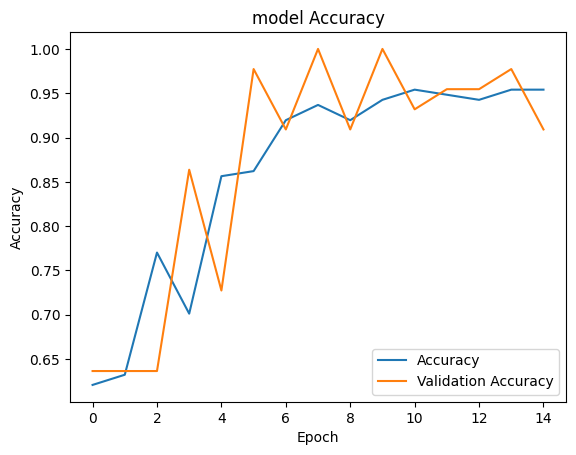

In [25]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h4>each epoches accuracy getting high that showed model is now improved its accuracy</h4>

<h4>further improvement of cnn model can be possible , using  ImageDataGenerator + DenseNet121 Architecture = perfact accuracy of cnn.</h4>
<h4>This process will ensure that model are learning pattern not memorizing the data</h4>
<h4>Below this code will generate the augmented images.</h4>

In [28]:

# this function is for data generator architecture for genrating fake images like genrative adversarial ai 
#this process will ensure that model are learning pattern not memorizing the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator()

# Creating data from train and validation so that model can be train on large data set 
train_generator = train_datagen.flow(
    X_train_rgb,
    y_train_encoded,
    batch_size=32
)

val_generator = val_datagen.flow(
    X_test_rgb,
    y_test_encoded,
    batch_size=32
)


Image 1: Min Pixel Value: 0.0, Max Pixel Value: 0.9980770945549011
Image 2: Min Pixel Value: 0.0, Max Pixel Value: 0.9987013936042786
Image 3: Min Pixel Value: 0.005384509917348623, Max Pixel Value: 0.998445451259613
Image 4: Min Pixel Value: 0.0324714295566082, Max Pixel Value: 0.9997678399085999
Image 5: Min Pixel Value: 0.0, Max Pixel Value: 0.9982874393463135
Image 6: Min Pixel Value: 0.0, Max Pixel Value: 0.9997657537460327
Image 7: Min Pixel Value: 0.006871995981782675, Max Pixel Value: 0.998928964138031
Image 8: Min Pixel Value: 0.01035678293555975, Max Pixel Value: 0.9982112646102905
Image 9: Min Pixel Value: 0.0, Max Pixel Value: 0.9968021512031555


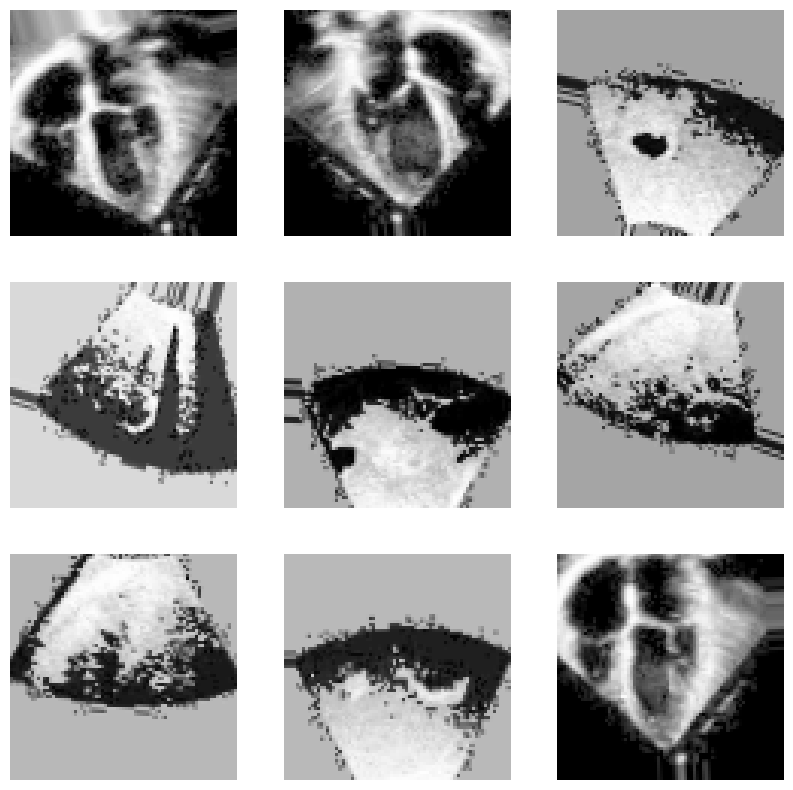

In [65]:
# so this code will show you how our generated images will look like  pixel ratio should be between 0 and 1 see below generated images
augmented_images = train_datagen.flow(X_train_rgb, y_train_encoded, batch_size=32)
augmented_images_batch, _ = next(augmented_images)

# Display augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
     #Print min and max pixel values of the current image
    print(f"Image {i+1}: Min Pixel Value: {np.min(augmented_images_batch[i])}, Max Pixel Value: {np.max(augmented_images_batch[i])}")
    plt.imshow(augmented_images_batch[i])
    plt.axis('off')
plt.show()
#below are similar data genrated to train the model for more data so that cnn model can improve its accuracy
#blow images are not exit in real word they are generated by making fool to dicriminator.

<h3>Below this code  for denseNet121 architecture best for 3 layer oprations(rgb)</h3>

In [46]:
#lets make a dens121 architecutre  of cnn there are many architecture but for grayscale to rgb converted images work perfact denseNet121
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(75, 75, 3))


# freezing base layer wont affect the output we only need top layer thats the work of transder learning model
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)  
predictions = Dense(1, activation='sigmoid')(x)

# creating new cnn model based on DensNet121 architecture 
model = Model(inputs=base_model.input, outputs=predictions)

#run the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#early stoping is a regularization technique for deep neural networks that stops training when parameter updates no longer begin to yield improves on a validation set
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


Training model with 30 epochs...
2/2 [==============================] - 0s 164ms/step
Epochs: 30
Accuracy: 0.9090909090909091
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333


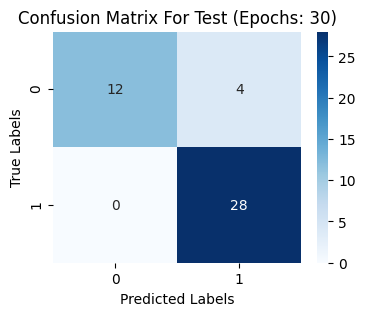

Training model with 60 epochs...
2/2 [==============================] - 1s 253ms/step
Epochs: 60
Accuracy: 0.9545454545454546
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


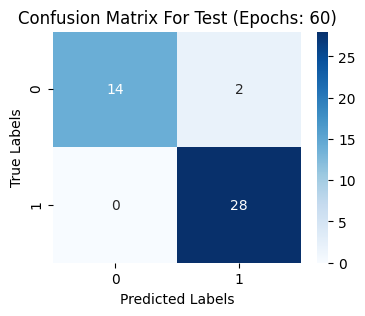

Training model with 90 epochs...
2/2 [==============================] - 1s 203ms/step
Epochs: 90
Accuracy: 0.9545454545454546
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


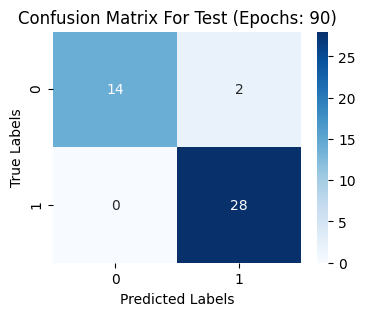

Training model with 120 epochs...
2/2 [==============================] - 1s 167ms/step
Epochs: 120
Accuracy: 0.9318181818181818
Precision: 0.9032258064516129
Recall: 1.0
F1 Score: 0.9491525423728814


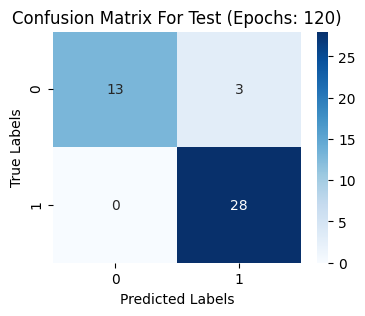

Training model with 250 epochs...
2/2 [==============================] - 0s 179ms/step
Epochs: 250
Accuracy: 0.9318181818181818
Precision: 0.9032258064516129
Recall: 1.0
F1 Score: 0.9491525423728814


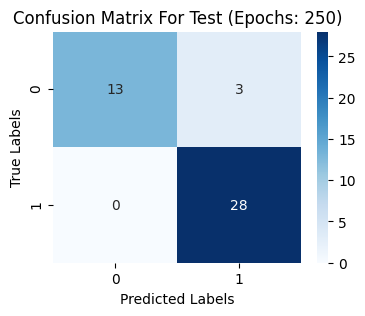

Training model with 300 epochs...
2/2 [==============================] - 1s 177ms/step
Epochs: 300
Accuracy: 0.9772727272727273
Precision: 0.9655172413793104
Recall: 1.0
F1 Score: 0.9824561403508771


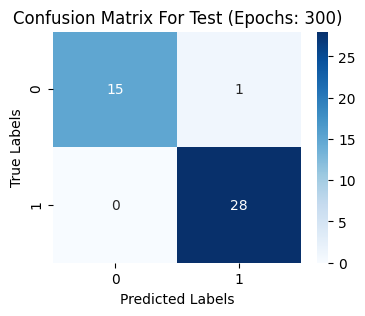

   Epochs  Accuracy  Precision  Recall  F1 Score
0      30  0.909091   0.875000     1.0  0.933333
1      60  0.954545   0.933333     1.0  0.965517
2      90  0.954545   0.933333     1.0  0.965517
3     120  0.931818   0.903226     1.0  0.949153
4     250  0.931818   0.903226     1.0  0.949153
5     300  0.977273   0.965517     1.0  0.982456


In [35]:
#till now we have created architecture now performed real+augmented data into this architecture  
# List of epochs to experiment with
epochs_to_try = [30, 60, 90, 120, 250, 300]

# we will store the result here 
evaluation_results = {'Epochs': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for epochs in epochs_to_try:
    print(f"Training model with {epochs} epochs...")
    
    history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[early_stopping], verbose=0)
    
    predictions = model.predict(X_test_rgb)
    
    threshold = 0.5
    binary_predictions = (predictions > threshold).astype(int)
    
    accuracy = accuracy_score(y_test_encoded, binary_predictions)
    precision = precision_score(y_test_encoded, binary_predictions)
    recall = recall_score(y_test_encoded, binary_predictions)
    f1 = f1_score(y_test_encoded, binary_predictions)
    
    evaluation_results['Epochs'].append(epochs)
    evaluation_results['Accuracy'].append(accuracy)
    evaluation_results['Precision'].append(precision)
    evaluation_results['Recall'].append(recall)
    evaluation_results['F1 Score'].append(f1)
    

    print(f"Epochs: {epochs}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
  
    conf_matrix = confusion_matrix(y_test_encoded, binary_predictions)
    plt.figure(figsize=(4, 3))  # Adjust the size of the plot here
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix For Test (Epochs: {epochs})')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
import pandas as pd
evaluation_df = pd.DataFrame(evaluation_results)
print(evaluation_df)


<h2>Here we go we have reached at peak accuracy  point this is last final accuracy ive got no more further anaylsis required now </h2>

<div style="text-align: center;">
  <h1>Task 3</h1>
  <p style="text-align: center;"><h3>Evaluation of only Heart Ultrasound Image Classification with Transfer Learning(Experiment 2 genrated data)</h3></p>
</div>


<h5>Using  pretraind tranfer learning model </h5>
<li>week 10 topic 9 GPT </li>

In [36]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# loading vgg16 model 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the convolutional base
base_model.trainable = False

# custmization in base layers 
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)  
predictions = Dense(1, activation='sigmoid')(x)

# creating final mdoel
model = Model(inputs=base_model.input, outputs=predictions)
#run the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

#see how model architecture lookes like
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0   

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# for this model we are defining early stoping 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-7)

# train the model with genrator data we have use datagenrator in 2 experiment we are using same data 
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)
#for 200 epoches  

Epoch 1/200
6/6 [==============================] - 11s 1s/step - loss: 1.0143 - accuracy: 0.4770 - val_loss: 0.9162 - val_accuracy: 0.3636 - lr: 1.0000e-05
Epoch 2/200
6/6 [==============================] - 6s 985ms/step - loss: 0.9230 - accuracy: 0.5402 - val_loss: 0.9114 - val_accuracy: 0.3636 - lr: 1.0000e-05
Epoch 3/200
6/6 [==============================] - 5s 992ms/step - loss: 1.0645 - accuracy: 0.4195 - val_loss: 0.9067 - val_accuracy: 0.3864 - lr: 1.0000e-05
Epoch 4/200
6/6 [==============================] - 5s 910ms/step - loss: 0.9723 - accuracy: 0.5115 - val_loss: 0.9026 - val_accuracy: 0.4091 - lr: 1.0000e-05
Epoch 5/200
6/6 [==============================] - 5s 896ms/step - loss: 0.9193 - accuracy: 0.5862 - val_loss: 0.8987 - val_accuracy: 0.4773 - lr: 1.0000e-05
Epoch 6/200
6/6 [==============================] - 5s 894ms/step - loss: 0.9934 - accuracy: 0.4885 - val_loss: 0.8952 - val_accuracy: 0.5455 - lr: 1.0000e-05
Epoch 7/200
6/6 [==============================] - 5s 

2/2 [==============================] - 2s 302ms/step
Accuracy on Test Set: 0.750000


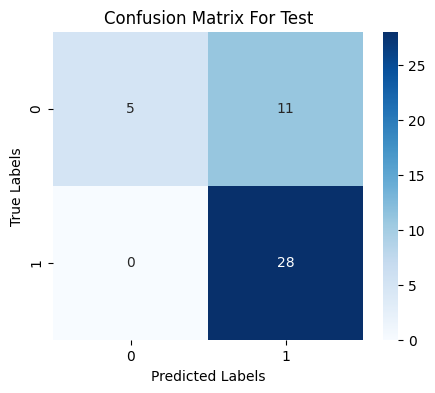

In [40]:
predictions = model.predict(X_test_rgb)
threshold = 0.5 
binary_predictions = (predictions > threshold).astype(int)

conf_matrix = confusion_matrix(y_test_encoded, binary_predictions)

accuracy = accuracy_score(y_test_encoded, binary_predictions) 
print("Accuracy on Test Set: {:f}".format(accuracy))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix For Test')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# so this model got 0.75000 accuracy which is good 

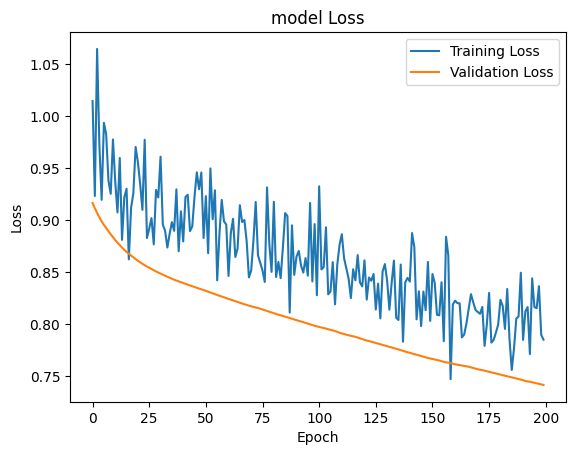

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
#blow are the representaion of vgg model 

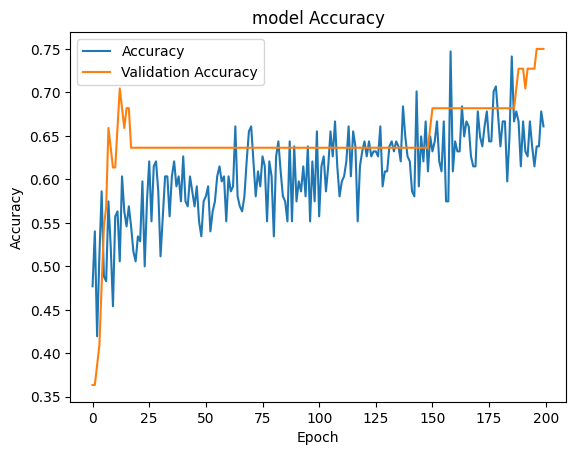

In [42]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the fist task we've got high accuracy model each model was able to classified the heart and non heart images reason of getting high accuracy could be possible of good preprocessing of images or might be possible of small dataset 

In secound task svm and rendom forest got high accuracy but cnn performend extremnly low ,we know cnn are made for compelx data set so i utilized the cnn model for further process to improve its accuracy . using ImageGenrator+ DenseNet121 architecture i train the model and got high accuracy 

in task 3 I choose transferlearning "we have seen this transfer learning model in topic 9 gpt leacture thats why  I choose VGG16 trasfer learning model and its also performed extreamly well.

<h1>most usefull thing in this coursework was</h1>
<li>LECTURE NOTE</li>
<li> tensorflow official website</li>
<li> kaggle</li>
<li>Clear path learnt in classroom and lab and guidance of our class professor</li>
<li>chatGpt(minimal)</li>

In [70]:
import io
from nbformat import current

filepath = 'final.ipynb' #this is the name of your coursework file!

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'ipynb')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

990


<h1>ALL SAVED MODEL UPLOADED IN GITHUB PLEASE CHEACKOUT</h1>
<a href="https://github.com/Akashsinghpanwar/datascience-Nd-machine-laerning-project/tree/main/CourseWork_heart_classification">GitHub Repository</a>
